# Reckitt Exploratory Data Analysis Document
Prepared by CPT6  
Master of Science in Data Science 2021 
Asian Institute of Management

---

*All rights reserved. No part of this document may be reproduced or transmitted in any form or by any means, or stored in any retrieval system of any nature without prior written permission.*

© 2021

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> EXECUTIVE SUMMARY </span></div>

This document presents an analysis of Reckitt's different data with regards to sales and product performance on the Lazada and Shopee channels that the company is selling IFCN (Infant and Child Nutrition) products on. To maximize insight on the datasets, look for hidden trends, and test underlying assumptions, exploratory data analysis is performed. This is an essential part of data analysis. In this document, several charts and visualizations are shown to present data regarding sales performance per channel, product performance, click rates, etc. 

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> 1. INTRODUCTION </span></div>

Reckitt, together with its subsidiary Mead Johnson Philippines, is the market leader in sales of baby food in the physical market in the Philippines, ahead of other known brands (Fig.1). Venturing into online retail, Reckitt seeks to establish its foothold in the baby foods market. 

<img src='https://i.imgur.com/f55K8rZ.png'>
<center><i><b>Fig. 1.</b> Baby Food Market in the Philippines</i></center>
<br />
  
  
As such, Reckitt, in undertaking this project, aims to:
1. Identify behavioral patterns and factors that affect consumer purchase in the context of e-commerce
2. Determine the factors that affect consumer’s propensity to purchase online; and,
3. Predict which campaigns will be successful in converting purchases



<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold">2. DATA PREPARATION </span></div>

This section loads the datasets for analysis. The datasets will be processed via Python and the Pandas Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import HTML, display
import pprint

sns.set(style="darkgrid", context="talk")

import warnings
warnings.filterwarnings("ignore")

In [2]:
pp = pprint.PrettyPrinter(indent=4, width=100)


HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}


</style>


<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
value="Click here to toggle on/off the raw code."></form>
''')

In [3]:
#read csv files
df_ba = pd.read_csv('sales_data.csv')

df_lz = (pd.read_csv('laz_data.csv')
         .rename(columns={'Unnamed: 0': 'index', 'platform.1':'platform_1'})
         .set_index('index'))

df_sp = (pd.read_csv('shopee_data.csv')
         .rename(columns={'Unnamed: 0': 'index', 'platform.1':'platform_1'})
         .set_index('index'))
         
df_sp = df_sp.drop(columns=['Unnamed: 0.1', 'month'])

df_fb = (pd.read_csv('fb_data.csv')
         .rename(columns={'Unnamed: 0': 'index', 'platform.1':'platform_1'})
         .set_index('index'))

#parse dates
df_ba['date'] = pd.to_datetime(df_ba['date'], format='%Y-%m-%d')
df_lz['date'] = pd.to_datetime(df_lz['date'], format='%Y-%m-%d')
df_sp['date'] = pd.to_datetime(df_sp['date'], format='%Y-%m-%d')
df_fb['date'] = pd.to_datetime(df_fb['date'], format='%Y-%m-%d')

<div><span style="background-color: #E72388; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #ffffff; font-size: 20px; font-weight: bold"> 3. EXPLORATORY DATA ANALYSIS </span></div>

This section contains some preprocessing steps and the analysis to gather insights from the various data provided by Reckitt via Exploratory Data Analysis (EDA). As stated above, EDA presents the data in a graphical manner for easier analysis. Each analysis will be augmented with an explanation to aide in clarity.

Note that all insights generated are based from the available data **ONLY**. No external data is fed to the current analysis scope.

### 3.1 Data Preprocessing

As an initial step, multibrands are removed for easier analysis. For example, `Enfagrow`, `Enfamama`, and `Enfamil` are all renamed to a single category `Enfa`.

In [4]:
#remove multibrands
df_lz = df_lz[df_lz.brand_name.isin(['Enfagrow', 'Lactum', 'Sustagen Premium'])]

df_ba['brand'] = df_ba.brand.replace({'Enfagrow': 'Enfa', 'Enfamama': 'Enfa', 
                         'Enfamil': 'Enfa', 'Sustagen Premium': 'Sustagen'})

df_lz['brand_name'] = df_lz.brand_name.replace({'Enfagrow': 'Enfa', 
                                                'Sustagen Premium': 'Sustagen'})

df_sp['brand'] = df_sp.brand.replace({'Enfagrow': 'Enfa', 
                                      'Sustagen Premium': 'Sustagen'})

### 3.2 Data Analysis

### Sales

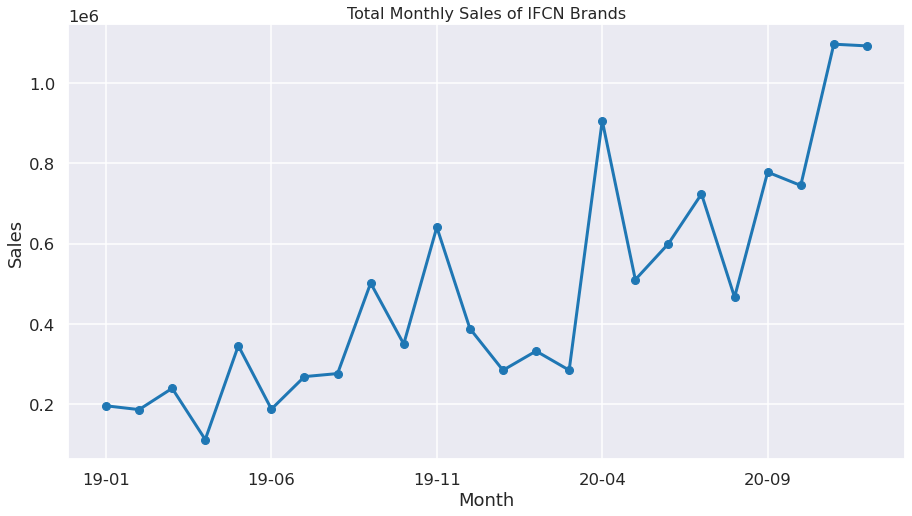

In [5]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_ba.groupby(df_ba['date'].dt.strftime("%y-%m"))['sales'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Total Monthly Sales of IFCN Brands', fontsize=16);

In a span of two years (2019 – 2020), sales of ICFN brands increased over time. The highest spike happened in April-2020. This could be attributed to the behavior of people one month after the lockdown. Because of the lockdown, people were unable to go out to buy their goods. Thus, it could be inferred that they turned to online shopping, which is shown in the plot above.

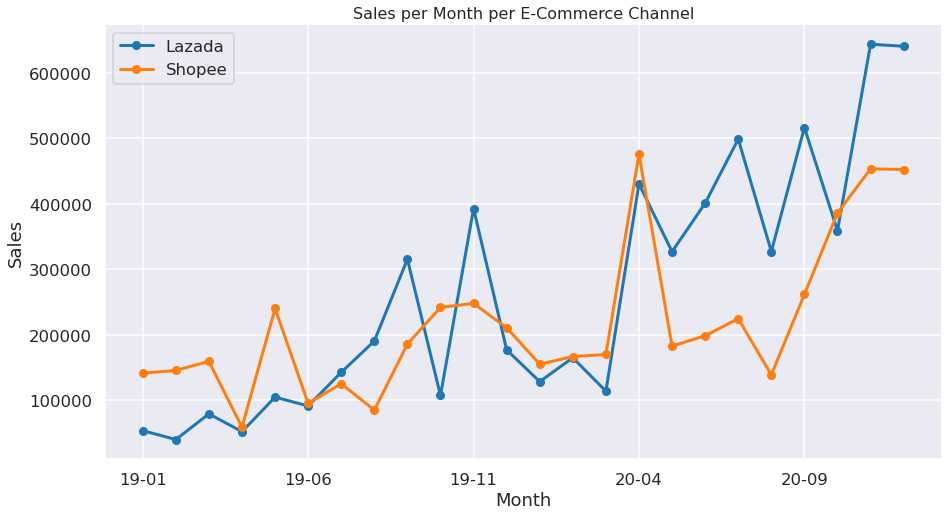

In [6]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='sales', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['channel'], aggfunc=np.sum)

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Sales per Month per E-Commerce Channel', fontsize=16);

This chart shows a comparison between Lazada and Shopee in terms of sales. In most months, Lazada has been the higher-performing channel. 

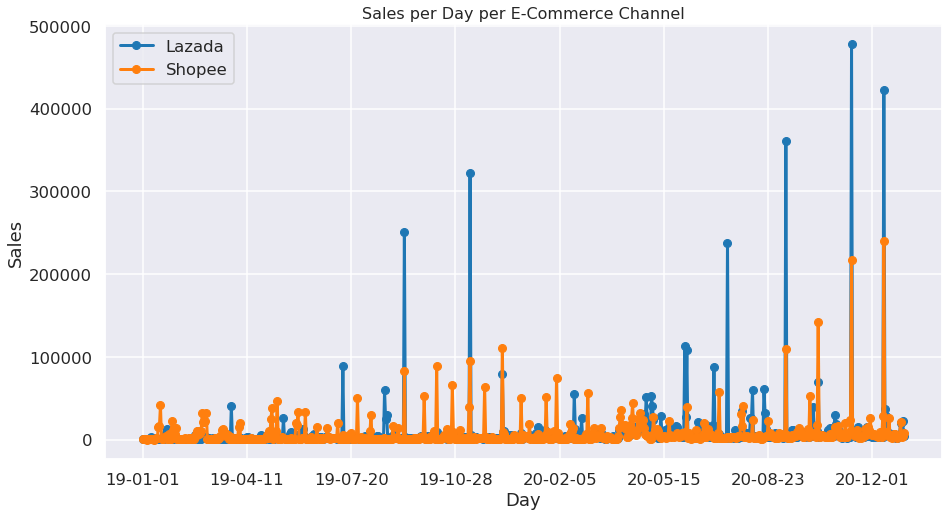

In [7]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='sales', 
                   index=df_ba['date'].dt.strftime("%y-%m-%d"), 
                   columns=['channel'], aggfunc=np.sum)

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Day')
ax.set_title('Sales per Day per E-Commerce Channel', fontsize=16);

Observing a more granular data shows the purchasing behavior of customers on a daily basis. The plot above shows that there are monthly spikes that occured during the 2nd half of the year. These spikes are due to e-commerce promo days (ie. 11-11, 12-12, 9-9). The top 5 days in terms of sales volume are from these promo days. However, there are also noticeable spikes from July 15, 2020 and June 4, 2020.

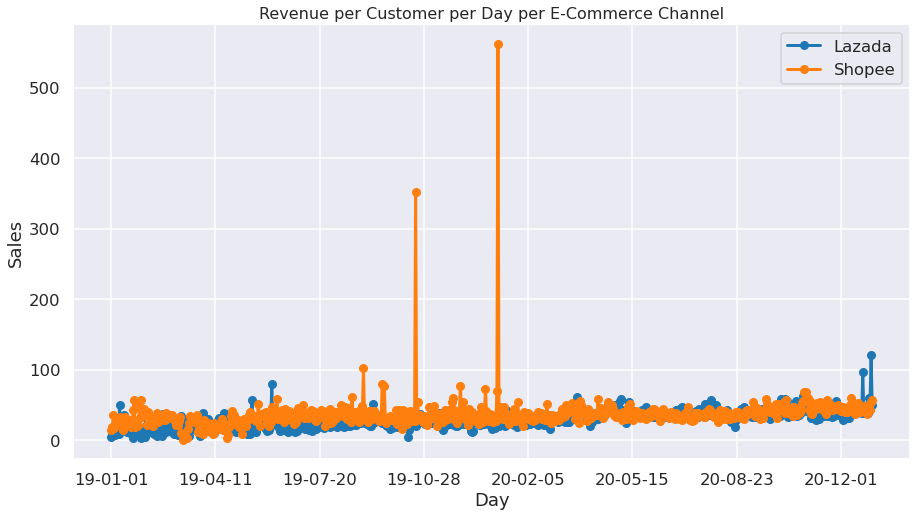

In [8]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d1 = pd.pivot_table(df_ba, values='sales', 
                   index=df_ba['date'].dt.strftime("%y-%m-%d"), 
                   columns=['channel'], aggfunc=np.sum)

d2 = pd.pivot_table(df_ba, values='buyer', 
                   index=df_ba['date'].dt.strftime("%y-%m-%d"), 
                   columns=['channel'], aggfunc=np.sum)

d = d1 / d2

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Day')
ax.set_title('Revenue per Customer per Day per E-Commerce Channel', fontsize=16);

The revenue per customer per day are fairly static. The large spikes are mostly driven by days that have a small number of transactions, which would intuitively skew the average purchase if some customers would purchase in bulk.

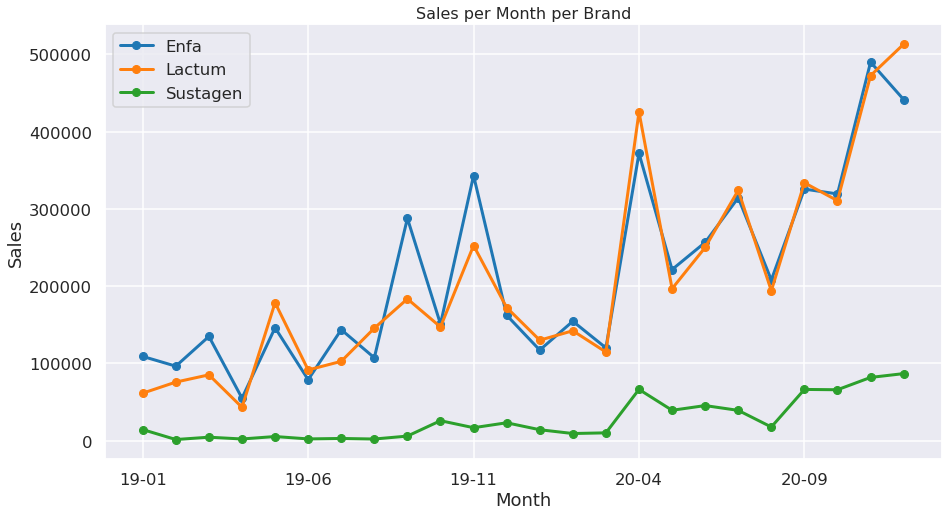

In [9]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='sales', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Sales per Month per Brand', fontsize=16);

This chart shows a comparison between Lazada and Shopee in terms of sales. In most months, Lazada has been the higher-performing channel. It could be hypothesized that this happens because more people seem to be using Lazada over Shoppe or more promos in Lazada than Shopee.

### Campaigns

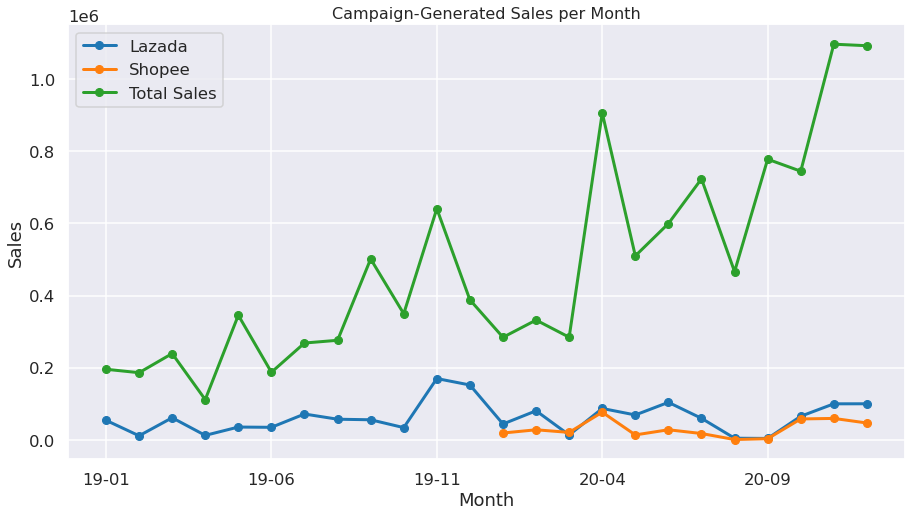

In [10]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d1 = df_lz.groupby(df_lz['date'].dt.strftime("%y-%m"))['revenue_usd'].sum()
d2 = df_sp.groupby(df_sp['date'].dt.strftime("%y-%m"))['gmv_usd'].sum()
d3 = df_ba.groupby(df_ba['date'].dt.strftime("%y-%m"))['sales'].sum()
d = d1.to_frame().join(d2, on='date').join(d3, on='date')
d = d.rename(columns={'revenue_usd':'Lazada', 'gmv_usd':'Shopee', 'sales':'Total Sales'})

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
d['Total Sales'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Total Sales')
# ax.get_legend().remove()
# ax.get_xaxis().set_visible(False)
ax.legend()
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Campaign-Generated Sales per Month', fontsize=16);

The campaign-generated sales per month shows that the behavior of the Shopee and Lazada campaign sales are correlated with each other. The total sales from the Business Advisor data also exhibit the same pattern as the campaign sales. Intuitively, the sales generated by campaigns are less than the total sales volume.

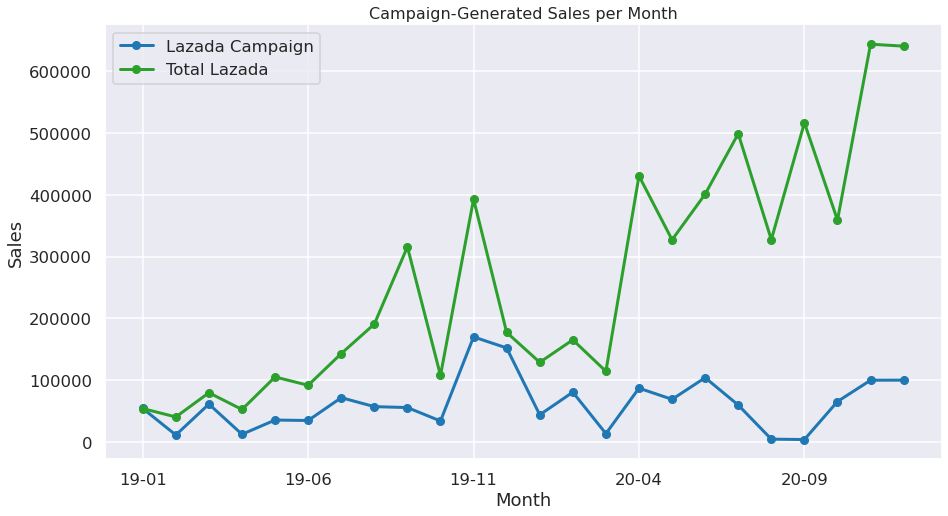

In [11]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d1 = df_lz.groupby(df_lz['date'].dt.strftime("%y-%m"))['revenue_usd'].sum()
d2 = df_sp.groupby(df_sp['date'].dt.strftime("%y-%m"))['gmv_usd'].sum()
d3 = pd.pivot_table(df_ba, values='sales', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['channel'], aggfunc=np.sum)
d = d1.to_frame().join(d2, on='date').join(d3, on='date')
d = d.rename(columns={'revenue_usd':'Lazada Campaign', 'gmv_usd':'Shopee Campaign', 'Lazada':'Total Lazada', 'Shopee': 'Total Shopee'})

d['Lazada Campaign'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada Campaign')
# d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
d['Total Lazada'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Total Lazada')
# ax.get_legend().remove()
# ax.get_xaxis().set_visible(False)
ax.legend()
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Campaign-Generated Sales per Month', fontsize=16);

The plot above compares the total sales volume generated from lazada versus campaign-generated volumes in Lazada. Overall, their behavior seems to be highly-correlated in 2019. However, the behavior in 2020 does not exhibit this kind of trend. This may be due to the lack of Facebook campaigns on certain periods in 2020. January 2019 is highly unusual since the campaign-generated volume exceeded the total sales from the platform.

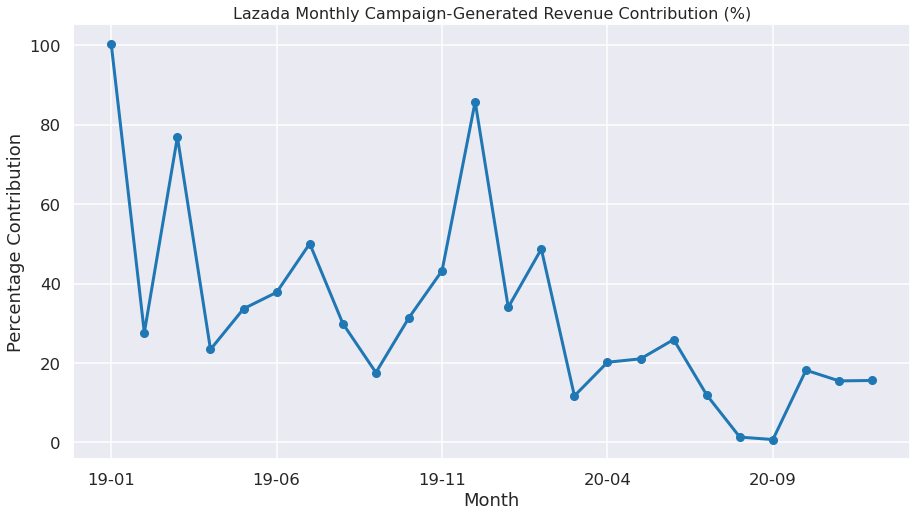

In [12]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

e = d['Lazada Campaign']/d['Total Lazada'] * 100

e.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada Campaigns Contribution (%)')

ax.set_ylabel('Percentage Contribution')
ax.set_xlabel('Month')
ax.set_title('Lazada Monthly Campaign-Generated Revenue Contribution (%)', fontsize=16);

Looking deeper in the campaign-generated sales contribution, Lazada campaign-generated revenues is high. Campaigns have contributed more than 20% on almost all months in 2019. In contrast to this behavior, 2020 data shows that campaign-generated revenue has significantly decreased.

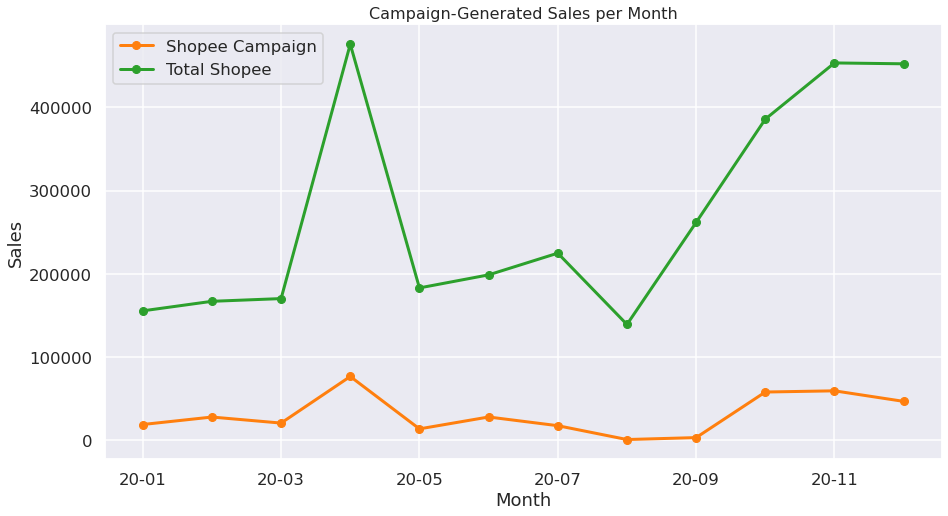

In [13]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d1 = df_lz.groupby(df_lz['date'].dt.strftime("%y-%m"))['revenue_usd'].sum()
d2 = df_sp.groupby(df_sp['date'].dt.strftime("%y-%m"))['gmv_usd'].sum()
d3 = pd.pivot_table(df_ba, values='sales', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['channel'], aggfunc=np.sum)
d = d1.to_frame().join(d2, on='date').join(d3, on='date')
d = d.rename(columns={'revenue_usd':'Lazada Campaign', 'gmv_usd':'Shopee Campaign', 'Lazada':'Total Lazada', 'Shopee': 'Total Shopee'})

# d['Lazada Campaign'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada Campaign')
d['Shopee Campaign'].tail(12).plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee Campaign')
d['Total Shopee'].tail(12).plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Total Shopee')
# ax.get_legend().remove()
# ax.get_xaxis().set_visible(False)
ax.legend()
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Campaign-Generated Sales per Month', fontsize=16);

In contrast to Lazada, campaign-generated sales from Shopee is quite low compared to the total sales generated in the e-commerce platform.

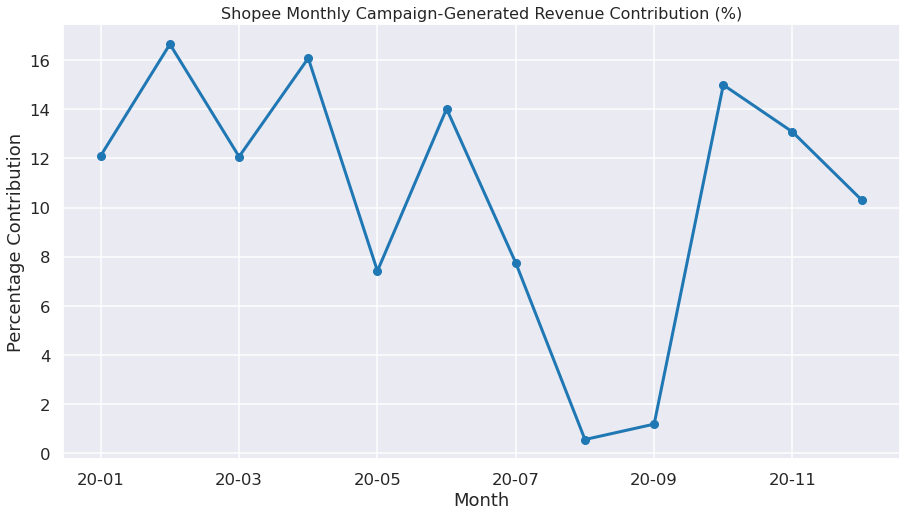

In [14]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

e = d['Shopee Campaign']/d['Total Shopee'] * 100

e.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada Campaigns Contribution (%)')

ax.set_ylabel('Percentage Contribution')
ax.set_xlabel('Month')
ax.set_title('Shopee Monthly Campaign-Generated Revenue Contribution (%)', fontsize=16);

The behavior of Shopee's campaign-generated sales is consistent with the previous plot. Percentage contribution has never exceeded 20%.

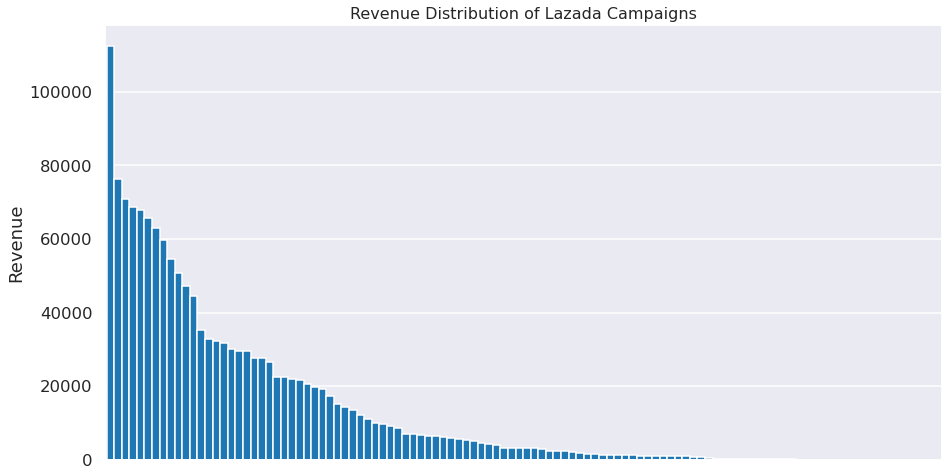

In [15]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_lz.groupby('campaign_id').revenue_usd.sum().sort_values(ascending=False)
d = d.reset_index().drop(columns='campaign_id')
d.plot(kind="bar", color='tab:blue', width=1, ax=ax)
ax.get_legend().remove()
ax.get_xaxis().set_visible(False)
ax.set_ylabel('Revenue')
ax.set_title('Revenue Distribution of Lazada Campaigns', fontsize=16);

The majority of the revenue from all Lazada campaigns only came from a few campaigns. While there are campaigns that generate a lot of revenue, most campaigns only generate smaller amounts. This behavior reflects a power law distribution where some campaigns are significantly better-performing than the majority.

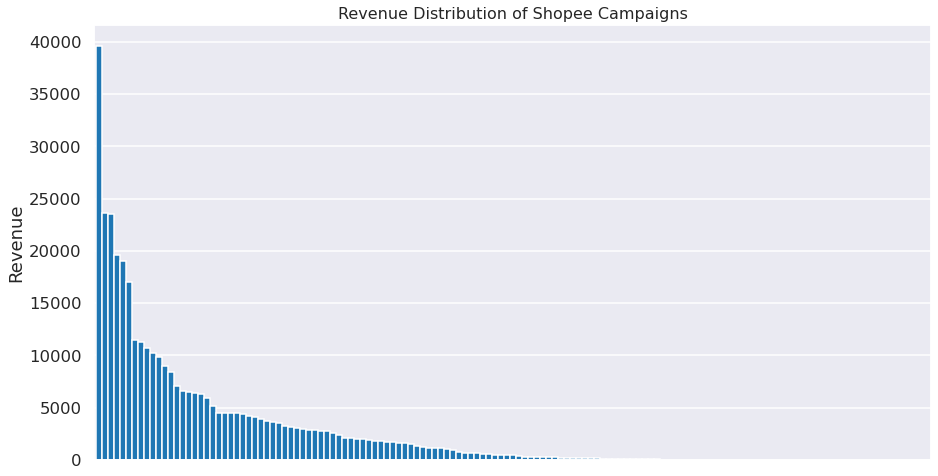

In [16]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_sp.groupby('campaign').gmv_usd.sum().sort_values(ascending=False)
d = d.reset_index().drop(columns='campaign')
d.plot(kind="bar", color='tab:blue', width=1, ax=ax)
ax.get_legend().remove()
ax.get_xaxis().set_visible(False)
ax.set_ylabel('Revenue')
ax.set_title('Revenue Distribution of Shopee Campaigns', fontsize=16);

Revenue distribution of Shopee campaigns is similar to Lazada's. It also exhibits a power law distribution.

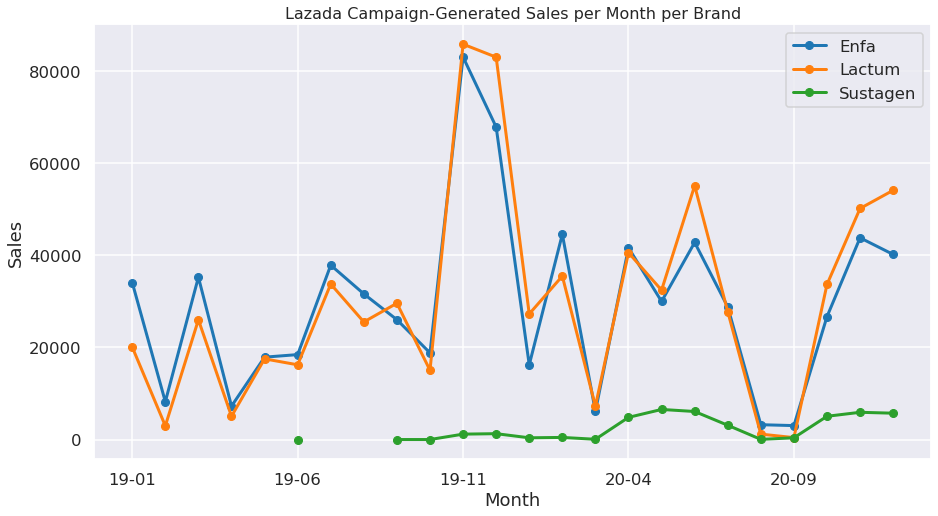

In [17]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_lz, values='revenue_usd', 
                   index=df_lz['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Lazada Campaign-Generated Sales per Month per Brand', fontsize=16);

The behavior of Enfagrow and Lactum are highly correlated with each other even though Enfagrow is a more premium brand than Lactum. This gives an initial impression that a similar amount of campaigns are placed for the two brands. Additionally, revenues generated by campaigns on Sustagen are not as large compared with Enfagrow and Lactum.

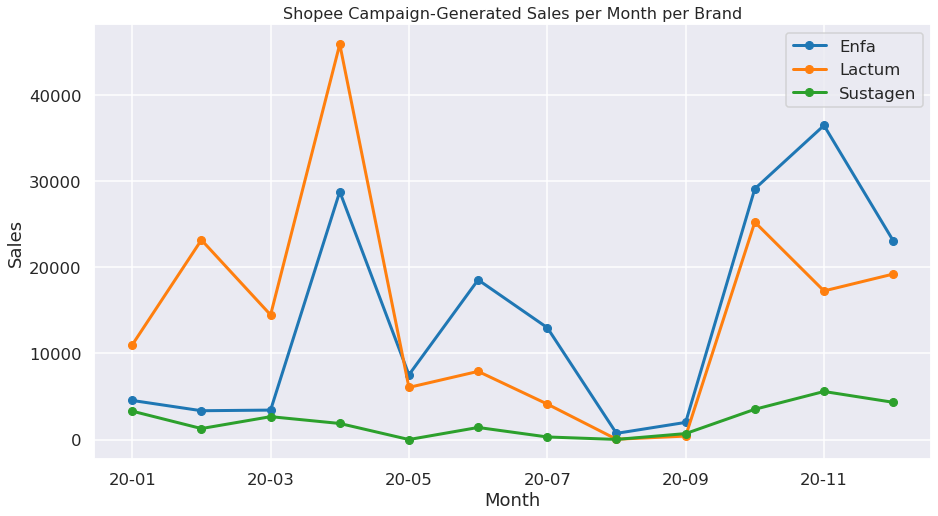

In [18]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_sp, values='gmv_usd', 
                   index=df_sp['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Shopee Campaign-Generated Sales per Month per Brand', fontsize=16);

Similar to the previous plot, the behavior of Enfagrow and Lactum’s monthly campaign-generated sales are correlated with each other. There was a massive spike in their campaign-generated sales last April, and one of the main reasons is because our country was put on lockdown. One noticeable behavior in the plot is the drop in Lactum’s campaign-generated sales during November. Given that November is the biggest month for the e-commerce giants because of the 11-11 days, this event is highly unusual.

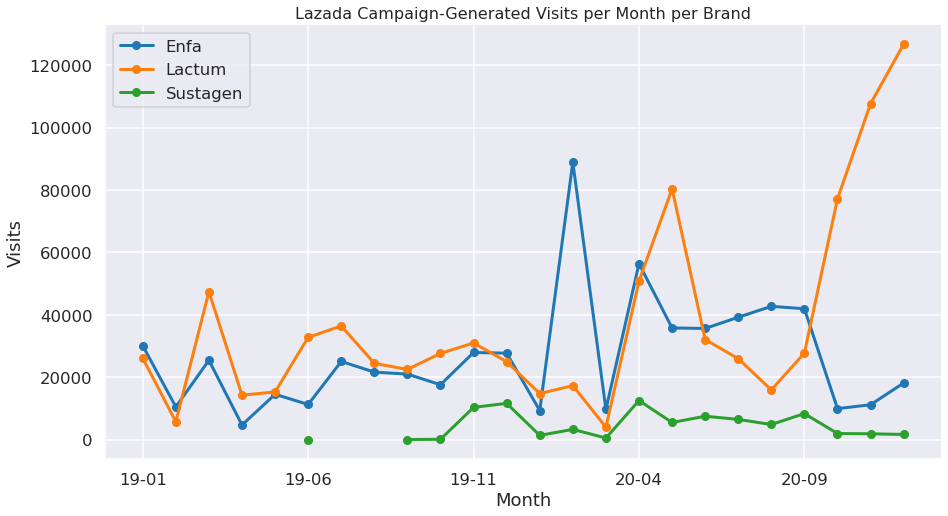

In [19]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_lz, values='visits', 
                   index=df_lz['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Visits')
ax.set_xlabel('Month')
ax.set_title('Lazada Campaign-Generated Visits per Month per Brand', fontsize=16);

In contrast to the campaign-generated sales plots, the behavior of Lactum and Enfagrow visits are not strongly correlated. This may be due to having a different brand being pushed for specific period, which resulted to a cyclical pattern in 2020.

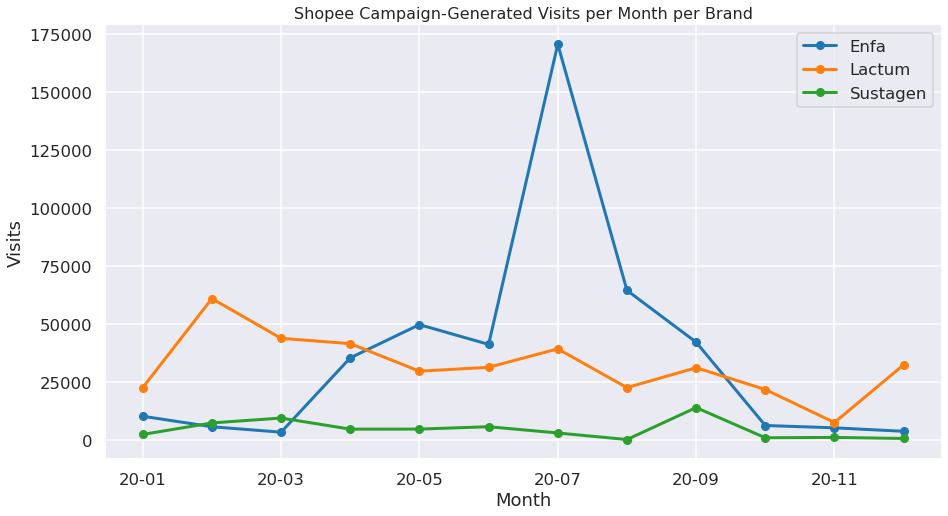

In [20]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_sp, values='visits', 
                   index=df_sp['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Visits')
ax.set_xlabel('Month')
ax.set_title('Shopee Campaign-Generated Visits per Month per Brand', fontsize=16);

For Shopee campaign-genereated visits, Lactum did not experience much growth throughout the year. Enfagrow, on the other hand, experienced consistent growth in terms of visits starting from March 2020 to July 2020. However, there's a significant drop in visits that started in August 2020, which can be attributed to the lack of FB campaigns during this period.

### Facebook

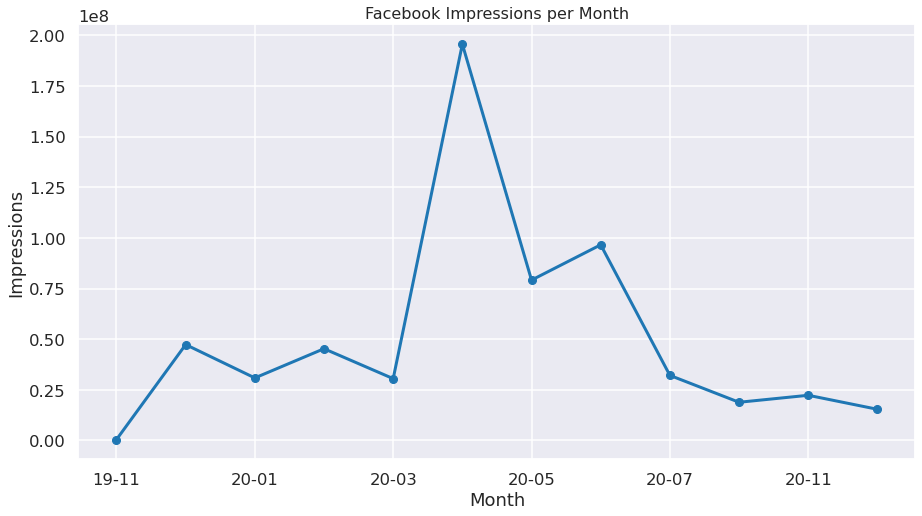

In [21]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['impressions'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Impressions')
ax.set_xlabel('Month')
ax.set_title('Facebook Impressions per Month', fontsize=16);

Facebook campaign impressions are relatively low during the first quarter of the year, but shoots up to a peak value in April. This may be driven by the shift in customer behavior during April 2020. 

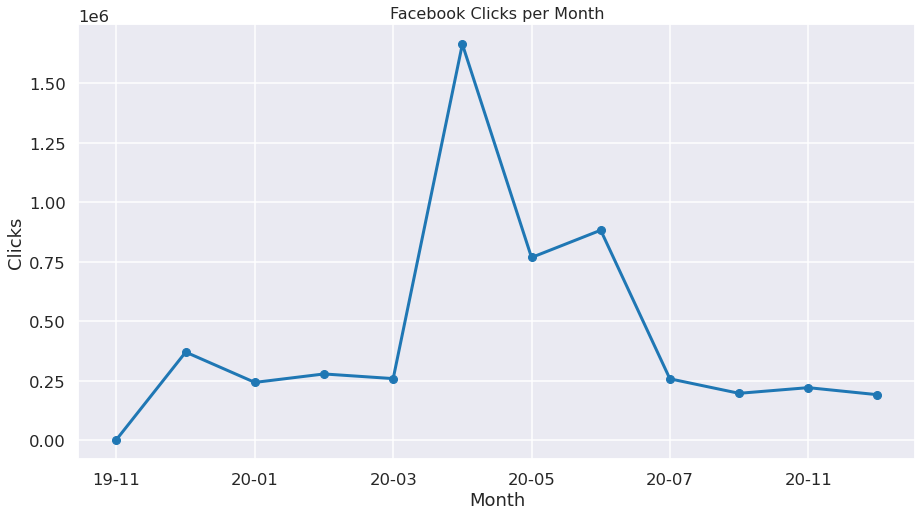

In [22]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['clicks'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Clicks')
ax.set_xlabel('Month')
ax.set_title('Facebook Clicks per Month', fontsize=16);

The behavior of Facebook Clicks per Month is almost precisely the same as that of the graph of Facebook Impressions per Month. 

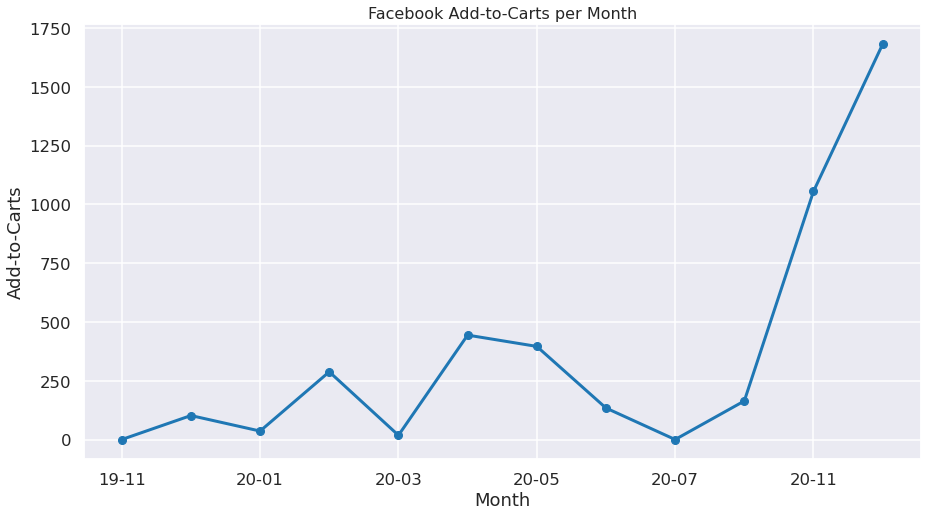

In [23]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['add_cart'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Add-to-Carts')
ax.set_xlabel('Month')
ax.set_title('Facebook Add-to-Carts per Month', fontsize=16);

In contrast to Facebook Impressions and Facebook Clicks,  Facebook Add-to Carts has significant spikes during November and December. The Facebook Add-to-Cart plot has similar behavior to the two previous charts from January until the third quarter of the year. However, The main difference is the linear increase of Add-to-carts starting from October and having a peak at December. This is quite unusual since intuition would tell us that the Impressions and Clicks are correlated to the Add-to-Carts. This tells us that there could be a change in customer's susceptibility to campaigns during this period (November and December).

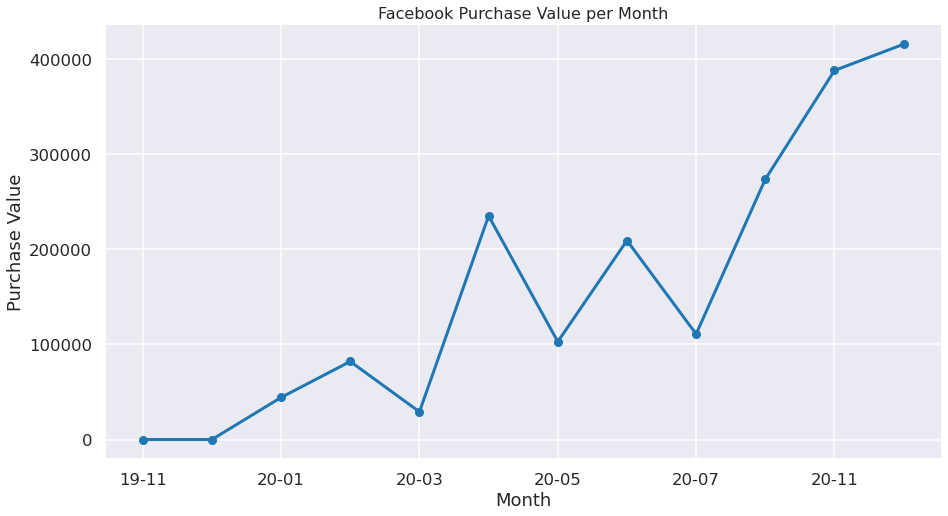

In [24]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['purchase_value'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Purchase Value')
ax.set_xlabel('Month')
ax.set_title('Facebook Purchase Value per Month', fontsize=16);

The Facebook Purchase Value per Month plot also reflects the same behavior from the Facebook Add-to-Carts per month. The purchase value having an average value at the first quarter of the year then also peaking at April shoots upward at the fourth quarter of the year.

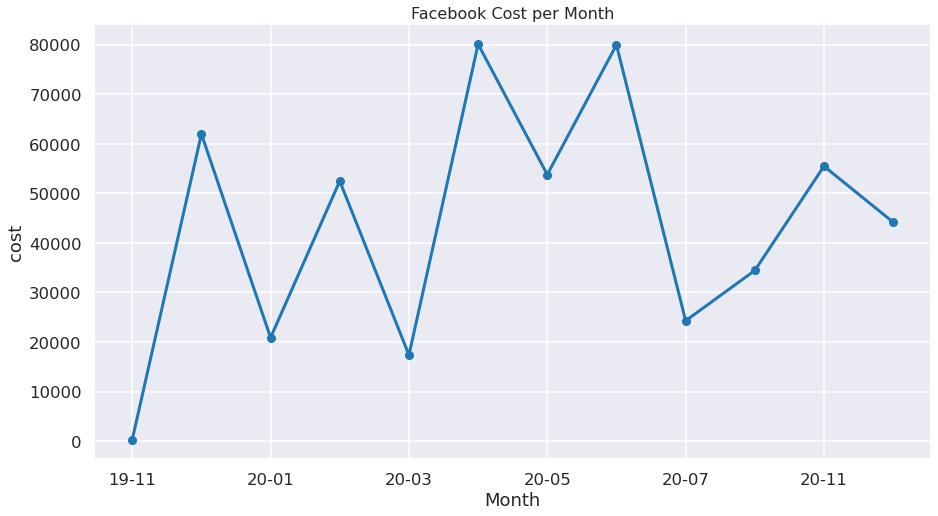

In [25]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['cost'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('cost')
ax.set_xlabel('Month')
ax.set_title('Facebook Cost per Month', fontsize=16);

The Facebook Cost per Month plot shows us that RB has significantly increased their campaign costs from November 2019 to December 2019. Moreover, the costs of the campaigns of RB was less in the first quarter and has a double top peak at the 2nd quarter, specifically in April and June.

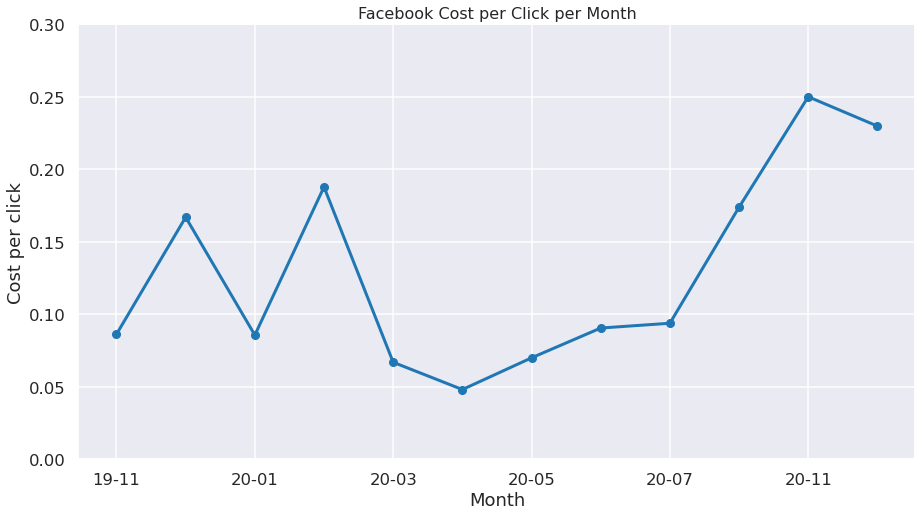

In [26]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d1 = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['cost'].sum()
d2 = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['clicks'].sum()

d = d1 / d2

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Cost per click')
ax.set_xlabel('Month')
ax.set_ylim([0,0.3])
ax.set_title('Facebook Cost per Click per Month', fontsize=16);

The lowest cost per click is in April. This gives us the insight that even though they shell out more in April, they could get more clicks and interactions from the campaigns in that month. We can also see that that cost per click is at the peak during the holidays, which supports our theory that customers are more selective in clicking ads during Christmas season.

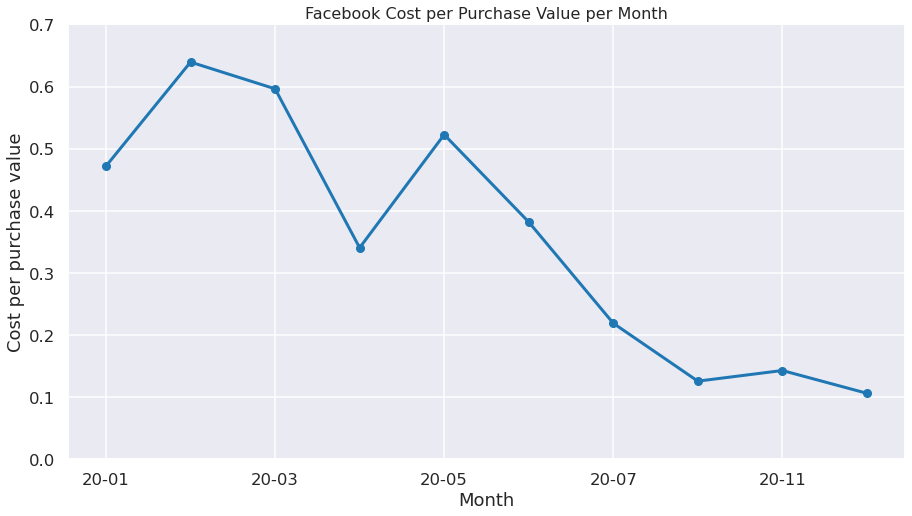

In [27]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d1 = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['cost'].sum()
d2 = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['purchase_value'].sum()

d = d1 / d2

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Cost per purchase value')
ax.set_xlabel('Month')
ax.set_ylim([0,0.7])
ax.set_title('Facebook Cost per Purchase Value per Month', fontsize=16);

The cost per purchase value has dropped during the second half of the year. This is driven by the significant increase in purchase value during this period. Note that cost per purchase value per month is less than 1, which indicates that Facebook ads are actually generating more revenue than ad spending. 